## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Machine Learning
## Elaborado por:

# André Proença 2016018783

# Isabel Castro 2018013160

## DATA SET ORIGINAL
## [https://archive.ics.uci.edu/ml/datasets/Bank+Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [33]:
import seaborn as sea
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

## Used functions

In [34]:
def randcolor(number):
    lista = []
    for i in range(number):
        color = "%06x" % random.randint(0, 0xFFFFFF)
        lista.append(color)
    return lista

In [35]:
def plotFigureBoxPlot(columnName,dataset):
    plt.figure(figsize=(6,9))
    sea.boxplot(x=columnName, data=dataset, color='green')
    plt.title("Boxplot of {}" .format(columnName),size=20,color="red")
    plt.xlabel("{}".format(columnName),size=15)

In [36]:
def numericAnalysis(columnName, dataframe):
    item = dataframe[columnName]

    print("Mean:\t", item.mean())
    print("Mode:\t", item.mode())
    print("Median:\t", item.median())
    print("Variance:\t", item.var())
    print("Std deviation:\t", item.std())
    print("Percentils (25, 50, 75):\t", item.quantile([0, 0.25, 0.5, 0.75, 1]))

In [37]:
def plotBarChart(dataset, columnName):
    sea.set(style='whitegrid', palette="bright", font_scale=1.1, rc={"figure.figsize": [15, 10]})
    if(dataset[columnName].dtype != 'object'):
        sea.histplot(x=columnName, data=dataset, bins=np.arange(0, 100, 5), kde=True)
    else:
        sea.histplot(x=columnName, data=dataset, bins=np.arange(0, 100, 5))
    plt.title(string.capwords(columnName) + " " + "distribution")

In [38]:
def plotPieChart(data, labels, title, color=None):

    fig1, ax1 = plt.subplots()
    if (color == None):
        plt.style.use('seaborn-pastel')
    ax1.pie(data,
            labels=labels,
            autopct="%.1f%%",
            startangle=90,
            colors=color,
            pctdistance=0.85)

    fig = plt.gcf()
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(title)

In [39]:
def plotBarChartByAgeRange(dataset, columnName, label, title):
    ageRange = list(range(15, 95, 5))

    plt.figure(figsize=(18, 25))
    plt.subplot(3, 2, 1)
    dataset.groupby(pd.cut(dataset.age, ageRange))[columnName].mean().plot.bar()
    plt.ylabel(label)
    plt.title(title)


## Dataset reading

In [40]:
fullDataset = pd.read_csv('bank-full.csv', sep=';')

In [41]:
plt.style.use("fivethirtyeight")

### Resampling Imbalanced Dataset

## Features Analysis

### Find the numeric outliers so that we can drop them when we get there

### Age

### Balance

In [42]:
# VAMOS DAR DROP A TODAS AS LINHAS COM BALANCE NEGATIVO E VAMOS TAMBEM DAR DROP A LINHAS COM BALANCE MUITO ALTOS
fullDataset.drop(fullDataset[(fullDataset['balance']>40000)|(fullDataset['balance']<0)].index,inplace=True,axis=0)

# Remover outliers da duration apos analise do boxplot

In [43]:
#Remove data where duration is bigger than 2500
fullDataset.drop(fullDataset[fullDataset['duration']>2500].index,inplace=True,axis=0)

### Campaign

# Remover outliers da campaign apos analise do boxplot

In [44]:
#Remove data where campaign is bigger than 35
fullDataset.drop(fullDataset[fullDataset['campaign']>35].index,axis=0,inplace=True)

### Pdays

##Remover outlier pdays

In [45]:
#Remove all pdays data
fullDataset.drop("pdays",inplace=True,axis=1)

### Previous

# Remover outliers previous apos analise do boxplot

In [46]:
#Remove all data where previous is bigger than 30
fullDataset.drop(fullDataset[fullDataset['previous']>30].index,axis=0,inplace=True)

In [47]:
X = fullDataset.drop('y',axis=1)
Y = fullDataset['y']

xData,xdataa,yData,ydataa = train_test_split(X,Y,train_size=0.22,stratify=Y)

yData=pd.DataFrame(yData,columns=['y'])
dataset = xData

## Stratified sampling


In [48]:

# Divide dataset between features e target


# Test and train must have similar loans value

dataset['binary'] = dataset['loan'].astype(str) + dataset['default'].astype(str)

x_train_set, x_test_set , y_train_set, y_test_set  = train_test_split(dataset,yData,train_size=0.8, random_state=0, stratify=dataset[['binary']])

# Remove binary column because it was only an aux for the split
x_train_set = x_train_set.drop("binary",axis=1)
x_test_set = x_test_set.drop("binary",axis=1)



## Undersampling ##

In [49]:
#isto vai ser util para comparar resultados dos algoritmos

In [50]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)

x_train_set_us,y_train_set_us = rus.fit_resample(x_train_set,y_train_set)
x_test_set_us,y_test_set_us = rus.fit_resample(x_test_set,y_test_set)

## Enconding categorical data

### Pipeline

In [51]:
num_cat = ['age','balance','day','campaign','previous','duration']
ordinal_cat = ['month','contact','poutcome']
one_hot_cat = ['job','marital','education','default','housing','loan']

num_pipe = Pipeline([('scaler',StandardScaler())])

categorical_transformer = Pipeline([('onehot',OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary'))])

cat_pipe_ordinal = Pipeline([('ordinal_encoder',OrdinalEncoder())])

preprocessor = ColumnTransformer([('num_enc',num_pipe,num_cat),('cat_enc',categorical_transformer,one_hot_cat),('ord_enc',cat_pipe_ordinal,ordinal_cat)])

x_train_set = preprocessor.fit_transform(x_train_set)
x_test_set = preprocessor.fit_transform(x_test_set)
x_train_set_us = preprocessor.fit_transform(x_train_set_us)
x_test_set_us = preprocessor.fit_transform(x_test_set_us)

### Without pipeline

In [52]:
#Binary Encoding

list_bin = ['default','housing','loan']
for i in list_bin:
    dataset[i] = LabelBinarizer().fit_transform(dataset[i].values)

#Ordinal Encoding

list_ordinal=['month','contact','poutcome']
for i in list_ordinal:
    dataset[i]=LabelEncoder().fit_transform(dataset[i].values)

# Dummy Encoding

dataset = pd.get_dummies(dataset, columns= ['job','marital','education'])

# Reset Index and check dataset again

dataset = dataset.reset_index()
dataset.drop('index', axis=1, inplace=True)

dataset['binary'] = dataset['loan'].astype(str) + dataset['default'].astype(str)

x_train_set_np, x_test_set_np , y_train_set_np, y_test_set_np = train_test_split(dataset,yData,test_size=0.2, random_state=0, stratify=dataset[['binary']])

# Binary columns no longer needed
x_train_set_np = x_train_set_np.drop("binary",axis=1)
x_test_set_np = x_test_set_np.drop("binary",axis=1)


#Scaling

ss= StandardScaler()

x_train_set_np_org = ss.fit_transform(x_train_set_np)
x_test_set_np_org = ss.fit_transform(x_test_set_np)

x_train_set_np_sc = ss.fit_transform(x_train_set_np[['age','balance','day','duration','campaign','previous']])
x_test_set_np_sc = ss.transform(x_test_set_np[['age','balance','day','duration','campaign','previous']])


#### META 2 ####

In [53]:
y_train_set['y'] = y_train_set['y'].map({'yes' : 1, 'no': 0})
y_test_set['y'] = y_test_set['y'].map({'yes' : 1 , 'no' : 0})
y_train_set_us['y'] = y_train_set_us['y'].map({'yes' : 1, 'no': 0})
y_test_set_us['y'] = y_test_set_us['y'].map({'yes' : 1 , 'no' : 0})

In [54]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, custom_metric=None)
models,predictions = clf.fit(x_train_set,x_test_set,y_train_set,y_test_set)
models

100%|██████████| 29/29 [00:13<00:00,  2.22it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.79,0.77,0.77,0.82,0.02
LGBMClassifier,0.90,0.72,0.72,0.90,0.13
XGBClassifier,0.89,0.71,0.71,0.89,0.27
GaussianNB,0.81,0.71,0.71,0.83,0.02
DecisionTreeClassifier,0.86,0.69,0.69,0.86,0.05
QuadraticDiscriminantAnalysis,0.77,0.69,0.69,0.80,0.05
BaggingClassifier,0.89,0.66,0.66,0.88,0.22
AdaBoostClassifier,0.89,0.66,0.66,0.88,0.30
RandomForestClassifier,0.90,0.65,0.65,0.88,0.54


##SUPERVISED##

## LOGISTIC REGRESSION ##

In [55]:
from sklearn.linear_model import LogisticRegression
clflr=LogisticRegression(random_state=0)

## Linear SVM ##

In [56]:
from sklearn import svm
clfsvm = svm.LinearSVC()

## Naive Bayes Gaussian ##

In [57]:
from sklearn.naive_bayes import GaussianNB
clfnb = GaussianNB()

## Naive Bayes MultinomialNB ##

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
clfmnb = MultinomialNB()

MinMax = MinMaxScaler()

x_train_set_np_nb = MinMax.fit_transform(x_train_set_np[['age','balance','day','campaign','previous','duration']])
x_test_set_np_nb = MinMax.fit_transform(x_test_set_np[['age','balance','day','campaign','previous','duration']])

clfmnb.fit(x_train_set_np_nb,y_train_set_np)
y_predmnb=clfmnb.predict(x_test_set_np_nb)
print("Accuracy:",accuracy_score(y_test_set_np,y_predmnb))
print("Precision:",precision_score(y_test_set_np,y_predmnb,pos_label='yes'))
print("Recall:",recall_score(y_test_set_np,y_predmnb,pos_label='yes'))
print("F1:",f1_score(y_test_set_np,y_predmnb,pos_label='yes'))
print("Confusion Matrix : \n",confusion_matrix(y_test_set_np,y_predmnb))

Accuracy: 0.8791208791208791
Precision: 0.0
Recall: 0.0
F1: 0.0
Confusion Matrix : 
 [[1600    0]
 [ 220    0]]


## KNeighbors ##

In [59]:
from sklearn.neighbors import KNeighborsClassifier

clfknn = KNeighborsClassifier()


## Decision Tree ##

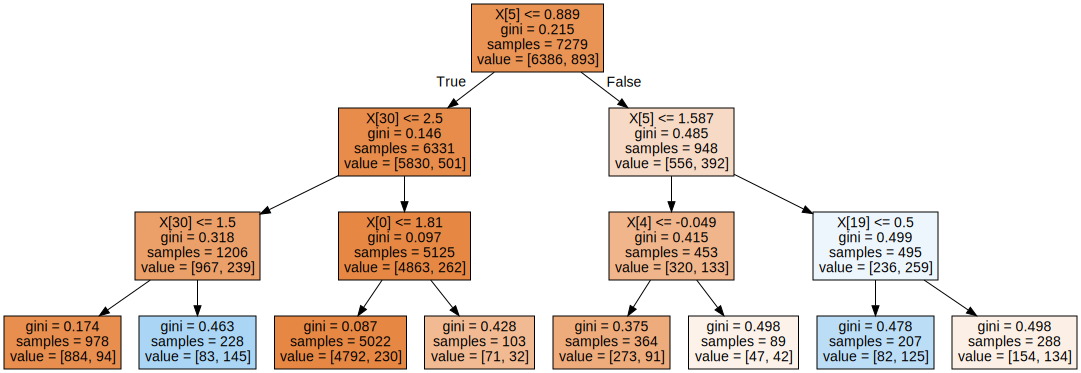

In [60]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

clftree = DecisionTreeClassifier(max_depth=3)
clftree.fit(x_train_set,y_train_set)
y_predtree = clftree.predict(x_test_set)
dot_data = export_graphviz(clftree,filled=True)
graph = graphviz.Source(dot_data)
graph

## Random Forest ##

In [61]:
from sklearn.ensemble import  RandomForestClassifier
clfrf=RandomForestClassifier()


## NeuralNetwork MLP ##

In [62]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier()


## Metricas dos Classificadores ##

<class 'sklearn.linear_model._logistic.LogisticRegression'> __main__
Accuracy: 0.8857142857142857
Precision: 0.5769230769230769
Recall: 0.20454545454545456
F1: 0.30201342281879195


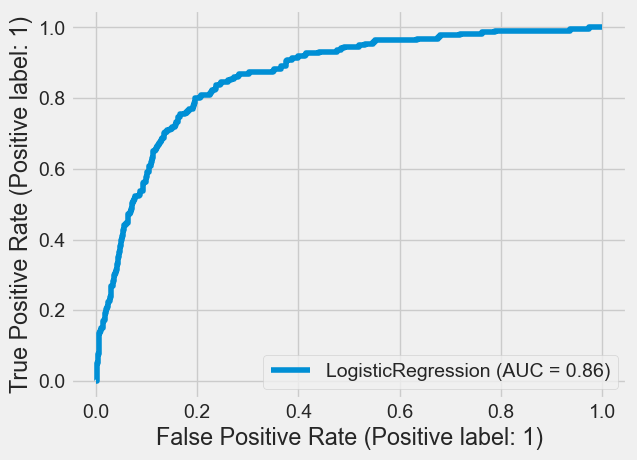

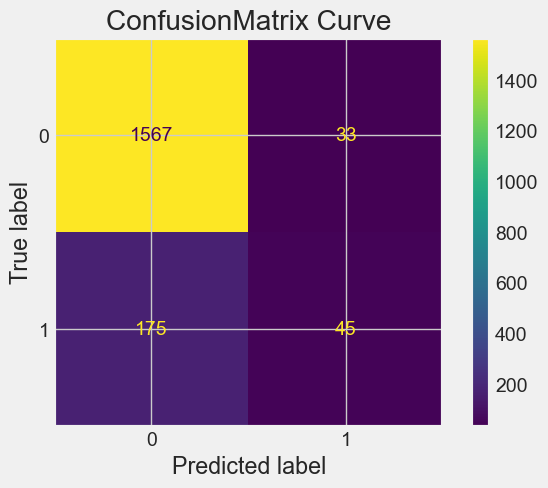

<class 'sklearn.svm._classes.LinearSVC'> __main__
Accuracy: 0.8862637362637362
Precision: 0.6101694915254238
Recall: 0.16363636363636364
F1: 0.25806451612903225


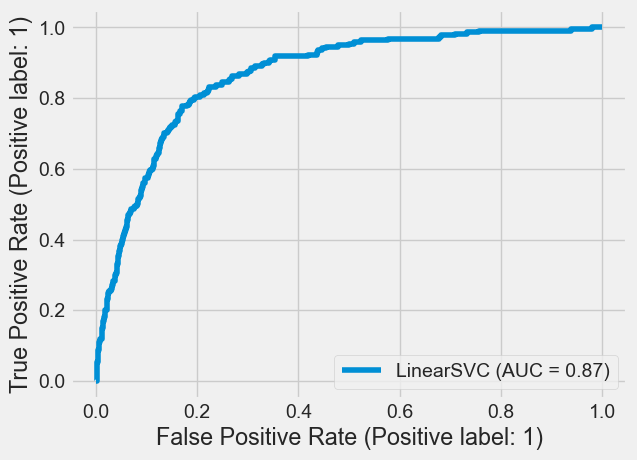

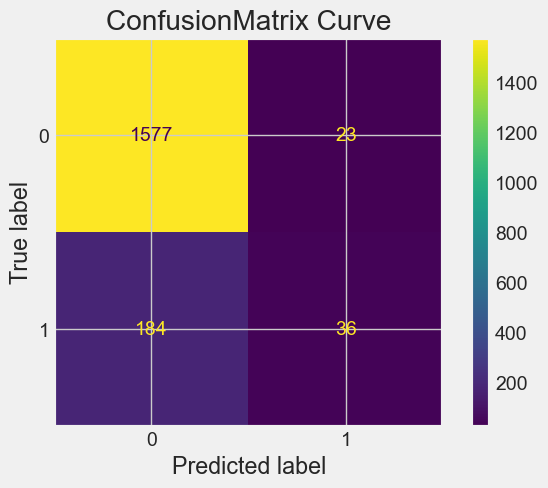

<class 'sklearn.naive_bayes.GaussianNB'> __main__
Accuracy: 0.8137362637362637
Precision: 0.33875338753387535
Recall: 0.5681818181818182
F1: 0.4244482173174872


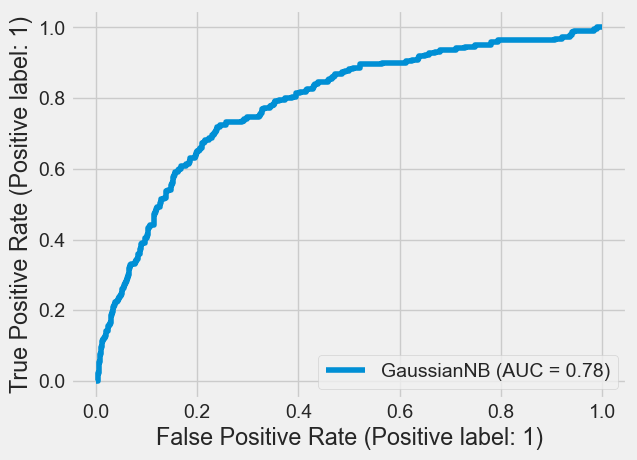

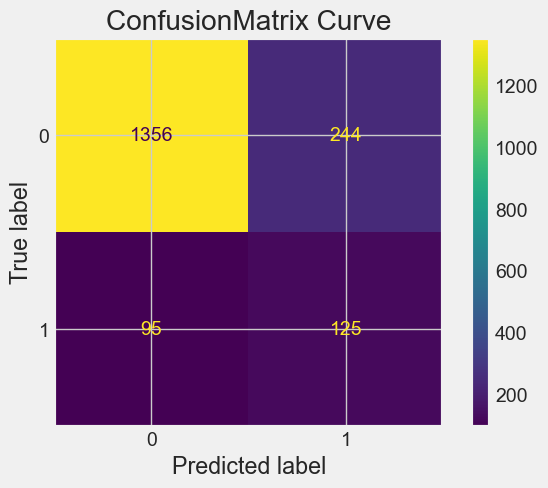

<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> __main__
Accuracy: 0.8917582417582418
Precision: 0.5804195804195804
Recall: 0.37727272727272726
F1: 0.4573002754820937


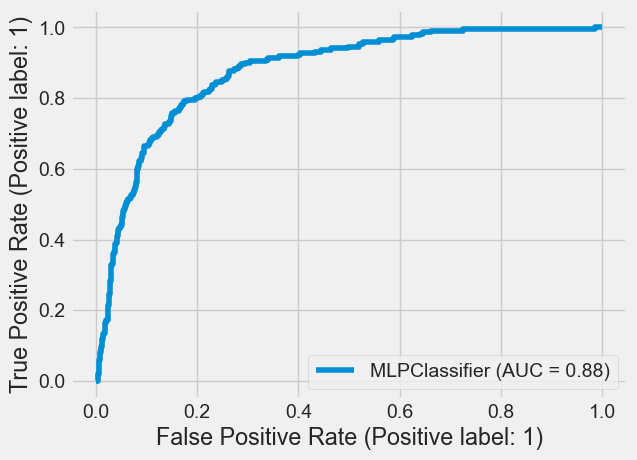

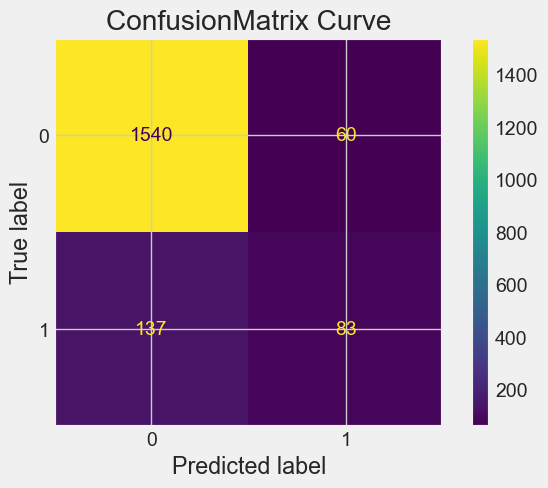

<class 'sklearn.tree._classes.DecisionTreeClassifier'> __main__
Accuracy: 0.8956043956043956
Precision: 0.6293103448275862
Recall: 0.33181818181818185
F1: 0.43452380952380953


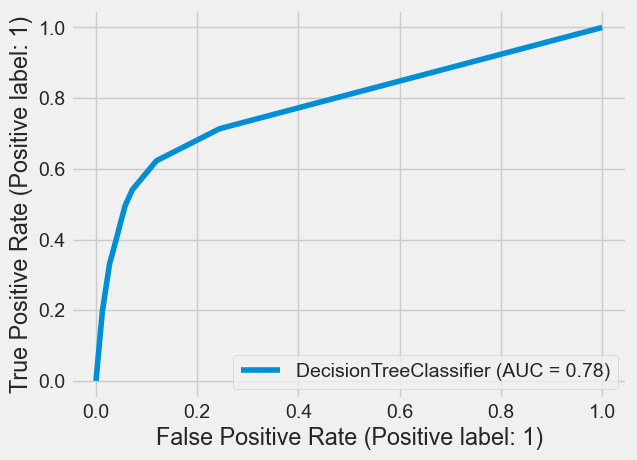

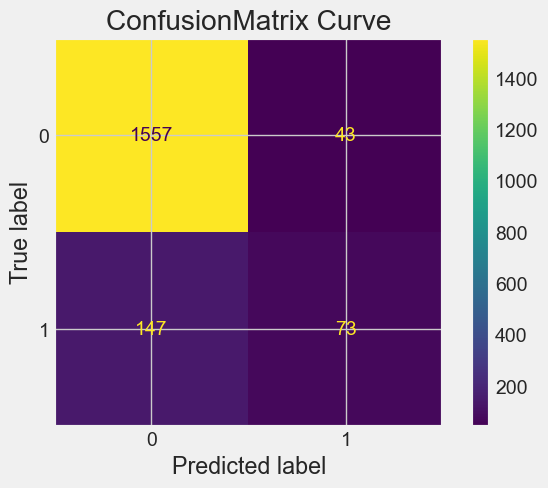

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> __main__
Accuracy: 0.8884615384615384
Precision: 0.5876288659793815
Recall: 0.2590909090909091
F1: 0.35962145110410093


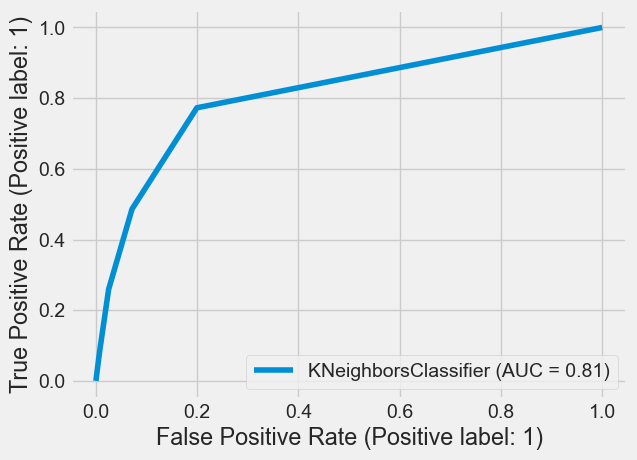

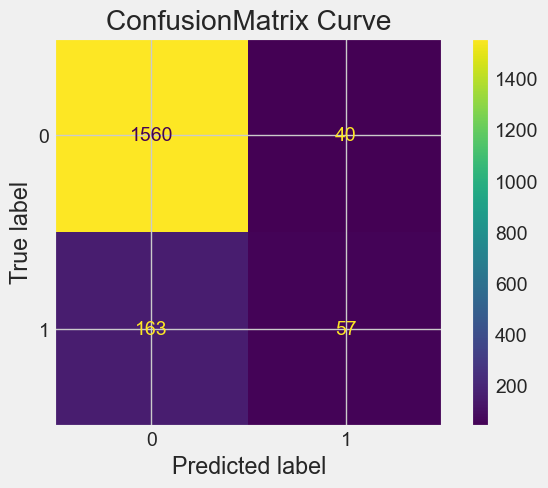

<class 'sklearn.ensemble._forest.RandomForestClassifier'> __main__
Accuracy: 0.893956043956044
Precision: 0.6451612903225806
Recall: 0.2727272727272727
F1: 0.38338658146964855


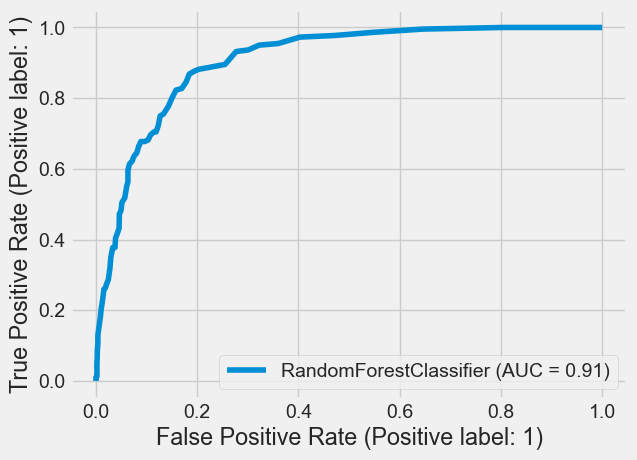

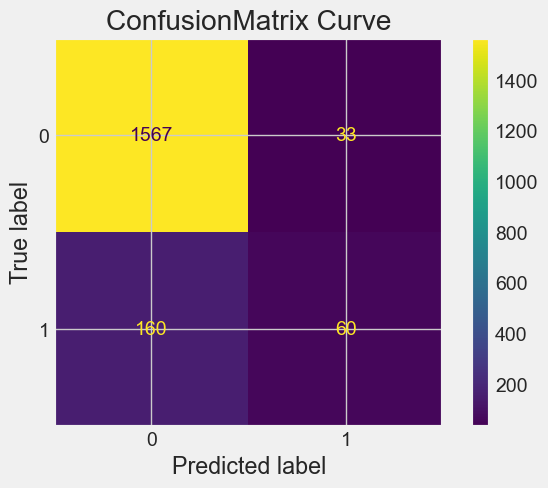

In [63]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,RocCurveDisplay

for clf in (clflr,clfsvm,clfnb,clfmlp,clftree,clfknn,clfrf):
    clf.fit(x_train_set,y_train_set)
    y_pred = clf.predict(x_test_set)
    print(clf.__class__,__name__)
    print("Accuracy:",accuracy_score(y_test_set,y_pred))
    print("Precision:",precision_score(y_test_set,y_pred))
    print("Recall:",recall_score(y_test_set,y_pred))
    print("F1:",f1_score(y_test_set,y_pred))
    
    RocCurveDisplay.from_estimator(clf,x_test_set,y_test_set)
    ConfusionMatrixDisplay.from_estimator(clf,x_test_set,y_test_set)
    plt.title("ConfusionMatrix Curve")
    plt.show()



## Metricas a usar GridSearchCrossValidation, encontrar os melhores valores ##

In [64]:
from sklearn.model_selection import GridSearchCV

## Grid Search ##

Melhores Hyperparametros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8972527472527473
Precision: 0.6774193548387096
Recall: 0.2863636363636364
F1: 0.40255591054313095


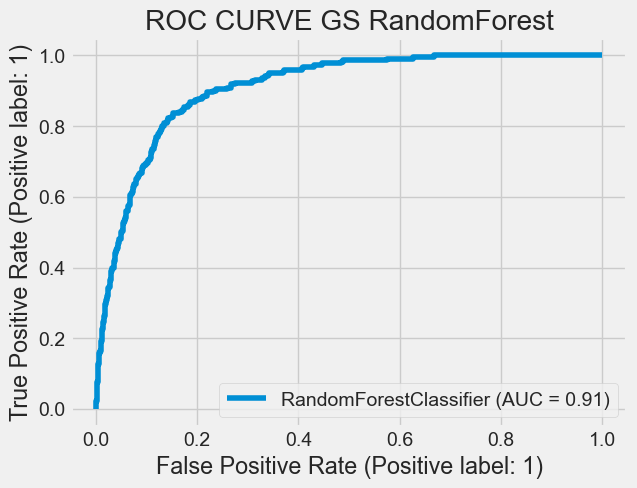

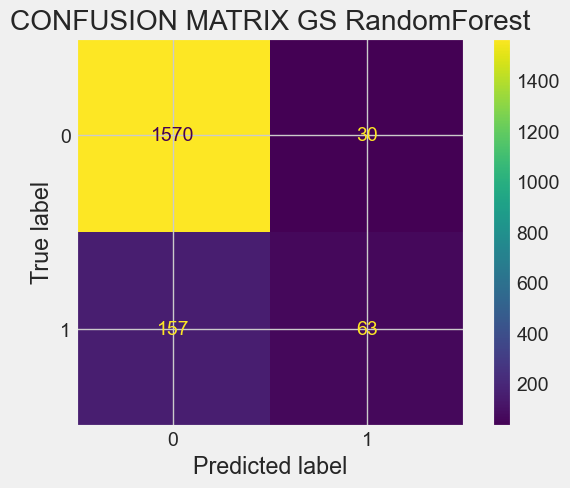

In [65]:

param_grid = {
    'n_estimators' : [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_searchrf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5, scoring='accuracy', n_jobs=-1)

grid_searchrf.fit(x_train_set,y_train_set)

print("Melhores Hyperparametros:",grid_searchrf.best_params_)

best_modelrf = grid_searchrf.best_estimator_

y_predrf = best_modelrf.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_predrf))
print("Precision:",precision_score(y_test_set,y_predrf))
print("Recall:",recall_score(y_test_set,y_predrf))
print("F1:",f1_score(y_test_set,y_predrf))
RocCurveDisplay.from_estimator(best_modelrf,x_test_set,y_test_set)
plt.title("ROC CURVE GS RandomForest")
ConfusionMatrixDisplay.from_estimator(best_modelrf,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX GS RandomForest")
plt.show()

## GRID SEARCH Logistic ##

Melhores Hyperparametros: {'C': 5}
Accuracy: 0.8846153846153846
Precision: 0.5625
Recall: 0.20454545454545456
F1: 0.3


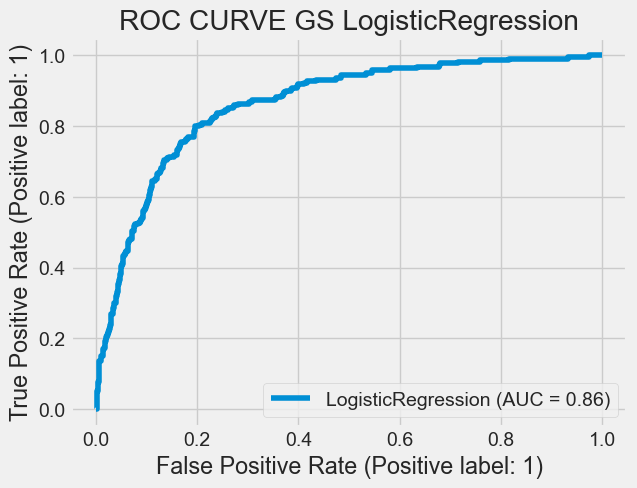

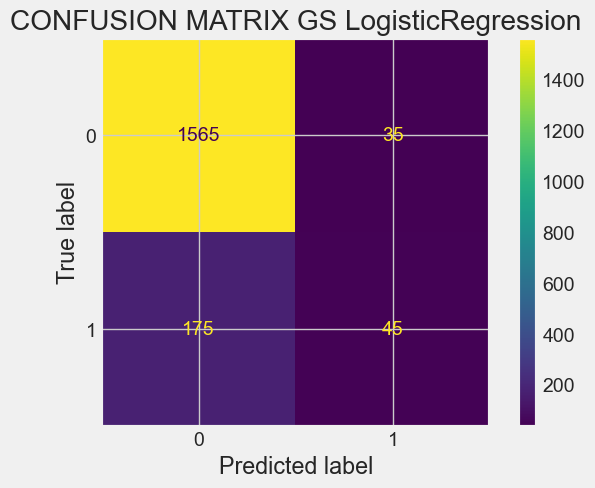

In [66]:
param_grid = {
    'C': [0.1, 1, 5, 10, 20, 30, 50, 80, 100]
}

lrr = LogisticRegression(solver='lbfgs', penalty='l2')
grid_searchlr = GridSearchCV(estimator=lrr, param_grid=param_grid,cv=5,scoring='accuracy')
grid_searchlr.fit(x_train_set,y_train_set)
print("Melhores Hyperparametros:",grid_searchlr.best_params_)

best_modellr = grid_searchlr.best_estimator_

y_predlr = best_modellr.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_predlr))
print("Precision:",precision_score(y_test_set,y_predlr))
print("Recall:",recall_score(y_test_set,y_predlr))
print("F1:",f1_score(y_test_set,y_predlr))
RocCurveDisplay.from_estimator(best_modellr,x_test_set,y_test_set)
plt.title("ROC CURVE GS LogisticRegression")
ConfusionMatrixDisplay.from_estimator(best_modellr,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX GS LogisticRegression")
plt.show()

## GridSearch MLP ##

Melhores Hyperparametros: {'alpha': 0.001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
Accuracy: 0.8868131868131868
Precision: 0.5406976744186046
Recall: 0.42272727272727273
F1: 0.4744897959183673


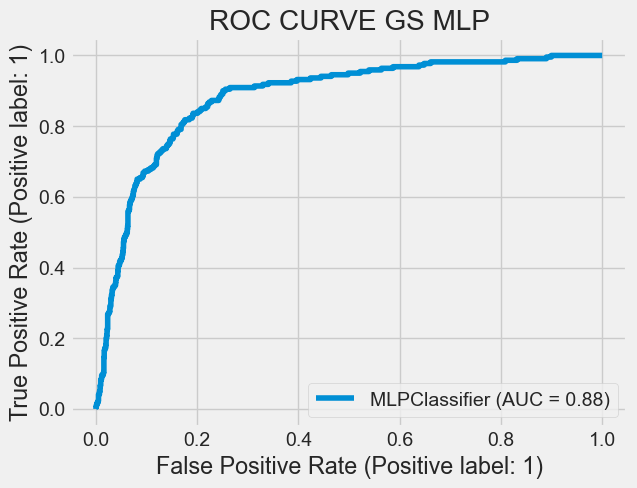

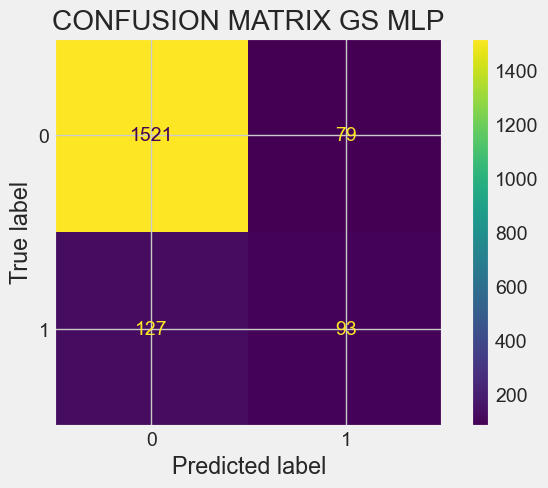

In [67]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}


mlp = MLPClassifier()
grid_searchmlp = GridSearchCV(estimator=mlp, param_grid=param_grid,cv=5,scoring='accuracy')
grid_searchmlp.fit(x_train_set,y_train_set)
print("Melhores Hyperparametros:",grid_searchmlp.best_params_)

best_modelmlp = grid_searchmlp.best_estimator_

y_predmlp = best_modelmlp.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_predmlp))
print("Precision:",precision_score(y_test_set,y_predmlp))
print("Recall:",recall_score(y_test_set,y_predmlp))
print("F1:",f1_score(y_test_set,y_predmlp))
RocCurveDisplay.from_estimator(best_modelmlp,x_test_set,y_test_set)
plt.title("ROC CURVE GS MLP")
ConfusionMatrixDisplay.from_estimator(best_modelmlp,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX GS MLP")
plt.show()

## GRIDSEARCH NO UNDERSAMPLED DATASET ##

## Random Forest UNDERSAMPLED DATASET ##

Melhores Hyperparametros: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8204545454545454
Precision: 0.7974683544303798
Recall: 0.8590909090909091
F1: 0.8271334792122538


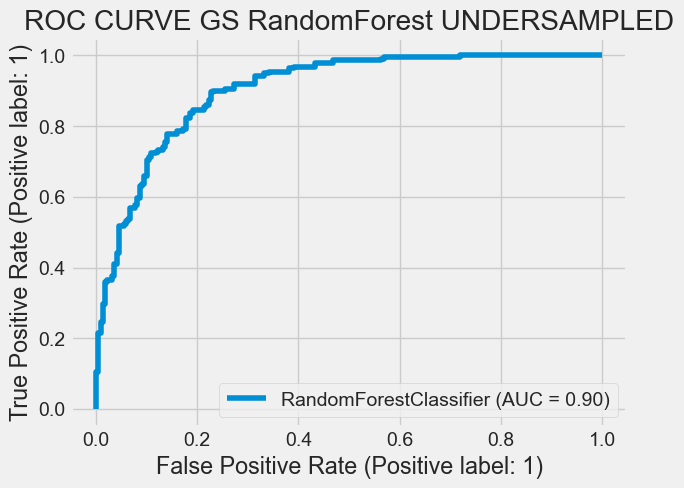

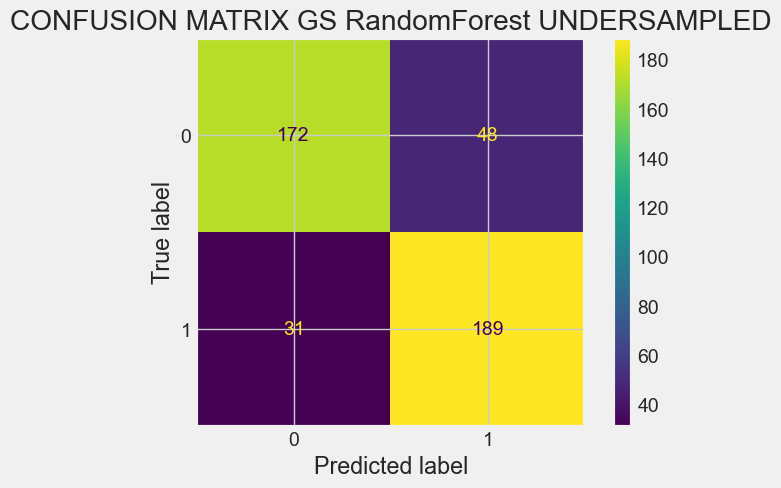

In [68]:
param_grid = {
    'n_estimators' : [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_searchrf_us = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5, scoring='accuracy', n_jobs=-1)

grid_searchrf_us.fit(x_train_set_us,y_train_set_us)

print("Melhores Hyperparametros:",grid_searchrf_us.best_params_)

best_modelrf_us = grid_searchrf_us.best_estimator_

y_predrf_us = best_modelrf_us.predict(x_test_set_us)

print("Accuracy:",accuracy_score(y_test_set_us,y_predrf_us))
print("Precision:",precision_score(y_test_set_us,y_predrf_us))
print("Recall:",recall_score(y_test_set_us,y_predrf_us))
print("F1:",f1_score(y_test_set_us,y_predrf_us))
RocCurveDisplay.from_estimator(best_modelrf_us,x_test_set_us,y_test_set_us)
plt.title("ROC CURVE GS RandomForest UNDERSAMPLED")
ConfusionMatrixDisplay.from_estimator(best_modelrf_us,x_test_set_us,y_test_set_us)
plt.title("CONFUSION MATRIX GS RandomForest UNDERSAMPLED")
plt.show()

## Logistic Regression UNDERSAMPLED DATASET ##

Melhores Hyperparametros: {'C': 5}
Accuracy: 0.5363636363636364
Precision: 1.0
Recall: 0.07272727272727272
F1: 0.13559322033898305


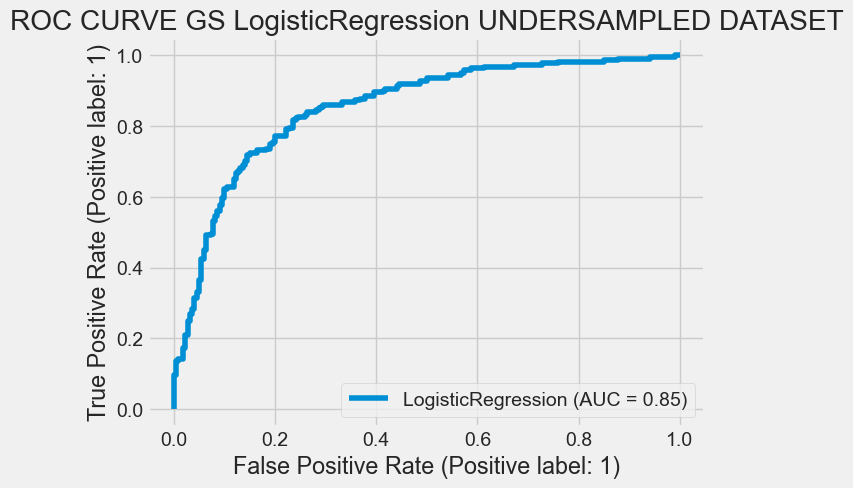

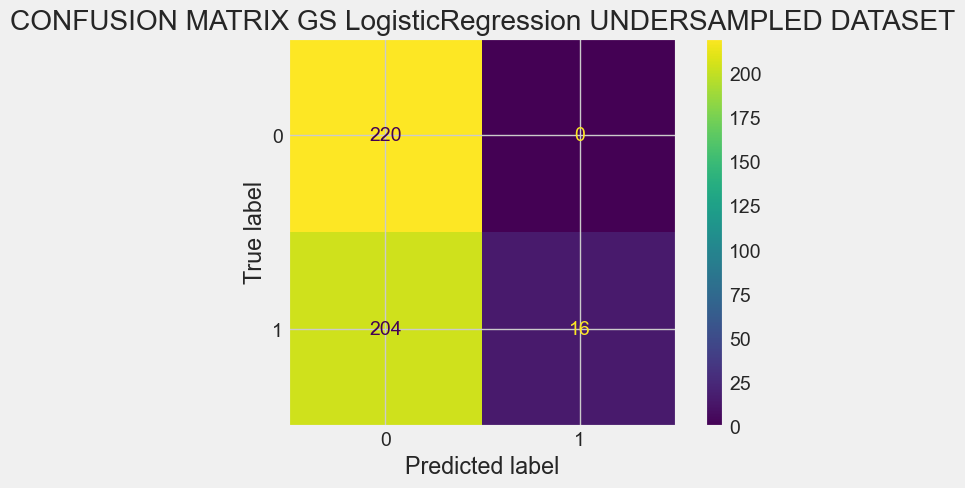

In [69]:
param_grid = {
    'C': [0.1, 1, 5, 10, 20, 30, 50, 80, 100]
}

lrr_us = LogisticRegression(solver='lbfgs', penalty='l2')
grid_searchlr_us = GridSearchCV(estimator=lrr_us, param_grid=param_grid,cv=5,scoring='accuracy')
grid_searchlr_us.fit(x_train_set,y_train_set)
print("Melhores Hyperparametros:",grid_searchlr_us.best_params_)

best_modellr_us = grid_searchlr_us.best_estimator_

y_predlr_us = best_modellr_us.predict(x_test_set_us)

print("Accuracy:",accuracy_score(y_test_set_us,y_predlr_us))
print("Precision:",precision_score(y_test_set_us,y_predlr_us))
print("Recall:",recall_score(y_test_set_us,y_predlr_us))
print("F1:",f1_score(y_test_set_us,y_predlr_us))
RocCurveDisplay.from_estimator(best_modellr_us,x_test_set_us,y_test_set_us)
plt.title("ROC CURVE GS LogisticRegression UNDERSAMPLED DATASET")
ConfusionMatrixDisplay.from_estimator(best_modellr_us,x_test_set_us,y_test_set_us)
plt.title("CONFUSION MATRIX GS LogisticRegression UNDERSAMPLED DATASET")
plt.show()

## Mlp Classifier UNDERSAMPLED DATASET ##

Melhores Hyperparametros: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Accuracy: 0.8159090909090909
Precision: 0.8008658008658008
Recall: 0.8409090909090909
F1: 0.8203991130820399


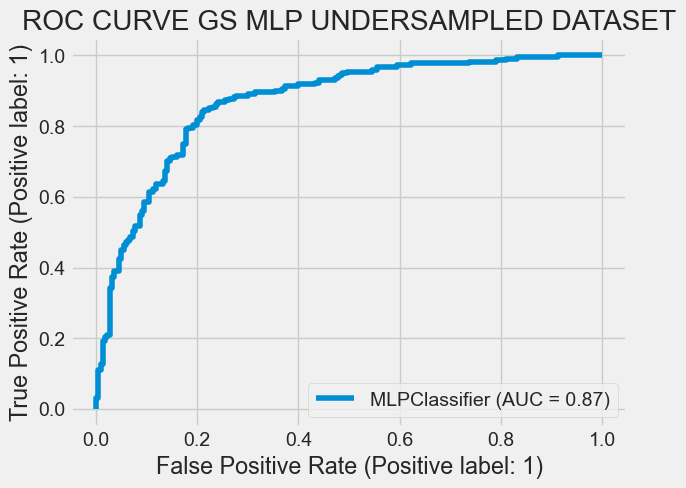

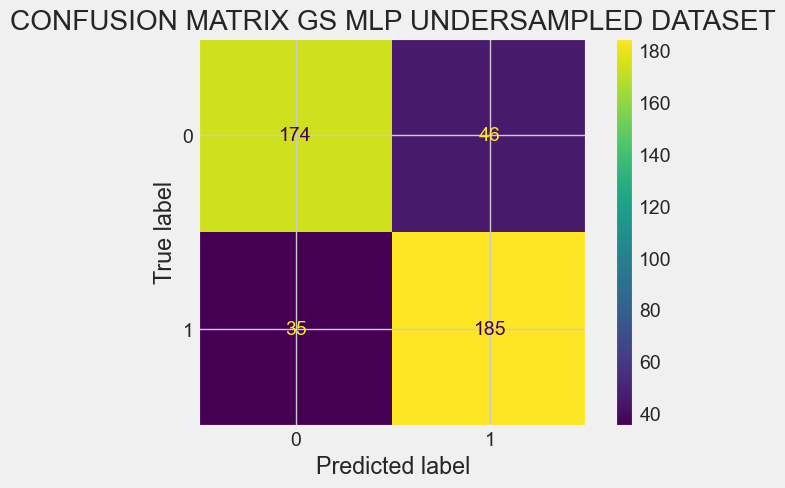

In [70]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}


mlp = MLPClassifier()
grid_searchmlp_us = GridSearchCV(estimator=mlp, param_grid=param_grid,cv=5,scoring='accuracy')
grid_searchmlp_us.fit(x_train_set_us,y_train_set_us)
print("Melhores Hyperparametros:",grid_searchmlp_us.best_params_)

best_modelmlp_us = grid_searchmlp_us.best_estimator_

y_predmlp_us = best_modelmlp_us.predict(x_test_set_us)

print("Accuracy:",accuracy_score(y_test_set_us,y_predmlp_us))
print("Precision:",precision_score(y_test_set_us,y_predmlp_us))
print("Recall:",recall_score(y_test_set_us,y_predmlp_us))
print("F1:",f1_score(y_test_set_us,y_predmlp_us))
RocCurveDisplay.from_estimator(best_modelmlp_us,x_test_set_us,y_test_set_us)
plt.title("ROC CURVE GS MLP UNDERSAMPLED DATASET")
ConfusionMatrixDisplay.from_estimator(best_modelmlp_us,x_test_set_us,y_test_set_us)
plt.title("CONFUSION MATRIX GS MLP UNDERSAMPLED DATASET")
plt.show()

## COMPARAR RESULTADOS UNDERSAMPLED DATASET VS NON UNDERSAMPLED ##

In [71]:
print("------------------------RANDOM FOREST----------------------")
print("[UNDERSAMPLED_DATASET]Accuracy:",accuracy_score(y_test_set_us,y_predrf_us),"[NORMAL_DATASET]Accuracy:",accuracy_score(y_test_set,y_predrf))
print("[UNDERSAMPLED_DATASET]Precision:",precision_score(y_test_set_us,y_predrf_us),"[NORMAL_DATASET]Precision:",precision_score(y_test_set,y_predrf))
print("[UNDERSAMPLED_DATASET]Recall:",recall_score(y_test_set_us,y_predrf_us),"[NORMAL_DATASET]Recall:",recall_score(y_test_set,y_predrf))
print("[UNDERSAMPLED_DATASET]F1:",f1_score(y_test_set_us,y_predrf_us),"[NORMAL_DATASET]F1:",f1_score(y_test_set,y_predrf))

------------------------RANDOM FOREST----------------------
[UNDERSAMPLED_DATASET]Accuracy: 0.8204545454545454 [NORMAL_DATASET]Accuracy: 0.8972527472527473
[UNDERSAMPLED_DATASET]Precision: 0.7974683544303798 [NORMAL_DATASET]Precision: 0.6774193548387096
[UNDERSAMPLED_DATASET]Recall: 0.8590909090909091 [NORMAL_DATASET]Recall: 0.2863636363636364
[UNDERSAMPLED_DATASET]F1: 0.8271334792122538 [NORMAL_DATASET]F1: 0.40255591054313095


In [72]:
print("------------------------LINEAR REGRESSION----------------------")
print("[UNDERSAMPLED_DATASET]Accuracy:",accuracy_score(y_test_set_us,y_predlr_us),"[NORMAL_DATASET]Accuracy:",accuracy_score(y_test_set,y_predlr))
print("[UNDERSAMPLED_DATASET]Precision:",precision_score(y_test_set_us,y_predlr_us),"[NORMAL_DATASET]Precision:",precision_score(y_test_set,y_predlr))
print("[UNDERSAMPLED_DATASET]Recall:",recall_score(y_test_set_us,y_predlr_us),"[NORMAL_DATASET]Recall:",recall_score(y_test_set,y_predlr))
print("[UNDERSAMPLED_DATASET]F1:",f1_score(y_test_set_us,y_predlr_us),"[NORMAL_DATASET]F1:",f1_score(y_test_set,y_predlr))

------------------------LINEAR REGRESSION----------------------
[UNDERSAMPLED_DATASET]Accuracy: 0.5363636363636364 [NORMAL_DATASET]Accuracy: 0.8846153846153846
[UNDERSAMPLED_DATASET]Precision: 1.0 [NORMAL_DATASET]Precision: 0.5625
[UNDERSAMPLED_DATASET]Recall: 0.07272727272727272 [NORMAL_DATASET]Recall: 0.20454545454545456
[UNDERSAMPLED_DATASET]F1: 0.13559322033898305 [NORMAL_DATASET]F1: 0.3


In [73]:
print("------------------------MLP REGRESSION----------------------")
print("[UNDERSAMPLED_DATASET]Accuracy:",accuracy_score(y_test_set_us,y_predmlp_us),"[NORMAL_DATASET]Accuracy:",accuracy_score(y_test_set,y_predmlp))
print("[UNDERSAMPLED_DATASET]Precision:",precision_score(y_test_set_us,y_predmlp_us),"[NORMAL_DATASET]Precision:",precision_score(y_test_set,y_predmlp))
print("[UNDERSAMPLED_DATASET]Recall:",recall_score(y_test_set_us,y_predmlp_us),"[NORMAL_DATASET]Recall:",recall_score(y_test_set,y_predmlp))
print("[UNDERSAMPLED_DATASET]F1:",f1_score(y_test_set_us,y_predmlp_us),"[NORMAL_DATASET]F1:",f1_score(y_test_set,y_predmlp))

------------------------MLP REGRESSION----------------------
[UNDERSAMPLED_DATASET]Accuracy: 0.8159090909090909 [NORMAL_DATASET]Accuracy: 0.8868131868131868
[UNDERSAMPLED_DATASET]Precision: 0.8008658008658008 [NORMAL_DATASET]Precision: 0.5406976744186046
[UNDERSAMPLED_DATASET]Recall: 0.8409090909090909 [NORMAL_DATASET]Recall: 0.42272727272727273
[UNDERSAMPLED_DATASET]F1: 0.8203991130820399 [NORMAL_DATASET]F1: 0.4744897959183673


## Ensemble techniques ##

### VOTING With best parameters from GridSearch ###

Accuracy: 0.8906593406593407
Precision: 0.5981308411214953
Recall: 0.2909090909090909
F1: 0.39143730886850153


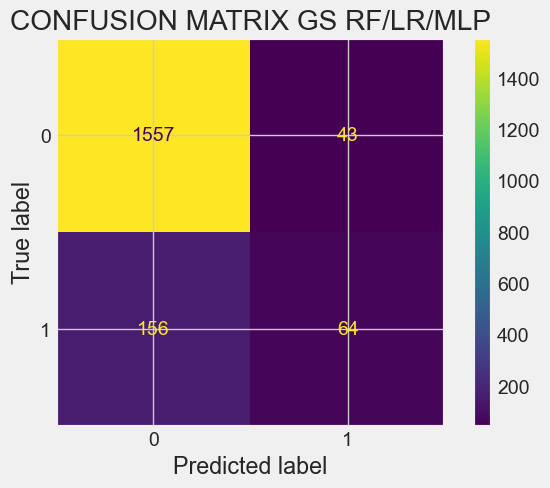

In [74]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('rfc',best_modelrf),('lr',best_modellr),('mlp',best_modelmlp)],voting='hard')

vc.fit(x_train_set,y_train_set)
y_pred_vc = vc.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_pred_vc))
print("Precision:",precision_score(y_test_set,y_pred_vc))
print("Recall:",recall_score(y_test_set,y_pred_vc))
print("F1:",f1_score(y_test_set,y_pred_vc))
ConfusionMatrixDisplay.from_estimator(vc,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX GS RF/LR/MLP")
plt.show()

## Ada Boosting - Random Forest ##

Accuracy: 0.8923076923076924
Precision: 0.59375
Recall: 0.34545454545454546
F1: 0.43678160919540227


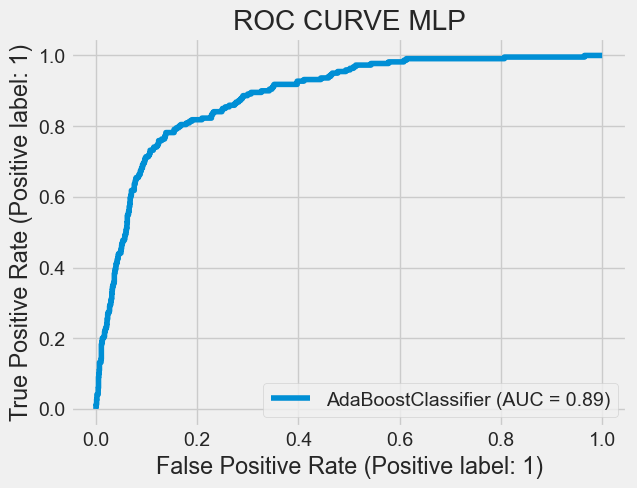

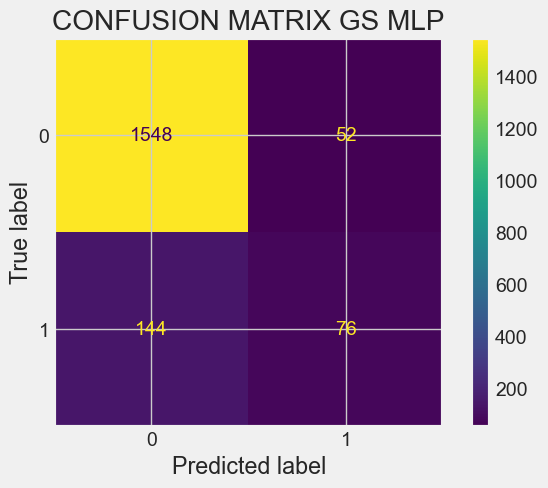

In [75]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)

adaclf = ada.fit(x_train_set,y_train_set)

y_pred_ada = adaclf.predict(x_test_set)
print("Accuracy:",accuracy_score(y_test_set,y_pred_ada))
print("Precision:",precision_score(y_test_set,y_pred_ada))
print("Recall:",recall_score(y_test_set,y_pred_ada))
print("F1:",f1_score(y_test_set,y_pred_ada))
RocCurveDisplay.from_estimator(adaclf,x_test_set,y_test_set)
plt.title("ROC CURVE ADABOOSTING Random Forest")
ConfusionMatrixDisplay.from_estimator(adaclf,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX ADABOOSTING Random Forest")
plt.show()

## AdaBoosting Logistic regression ##

Accuracy: 0.8846153846153846
Precision: 0.5694444444444444
Recall: 0.18636363636363637
F1: 0.2808219178082192


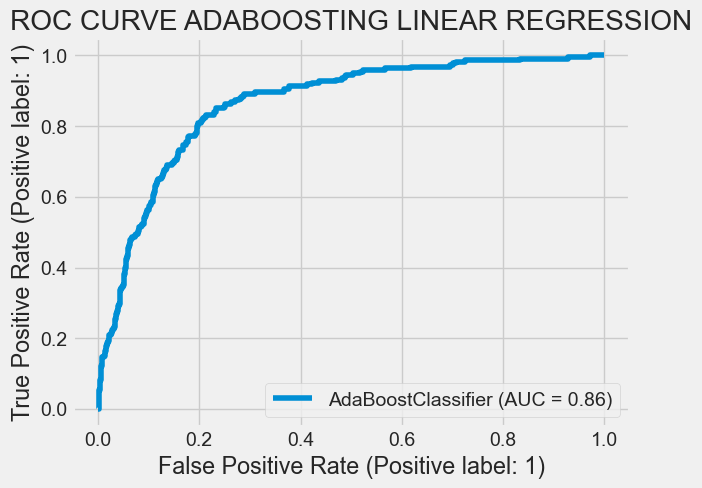

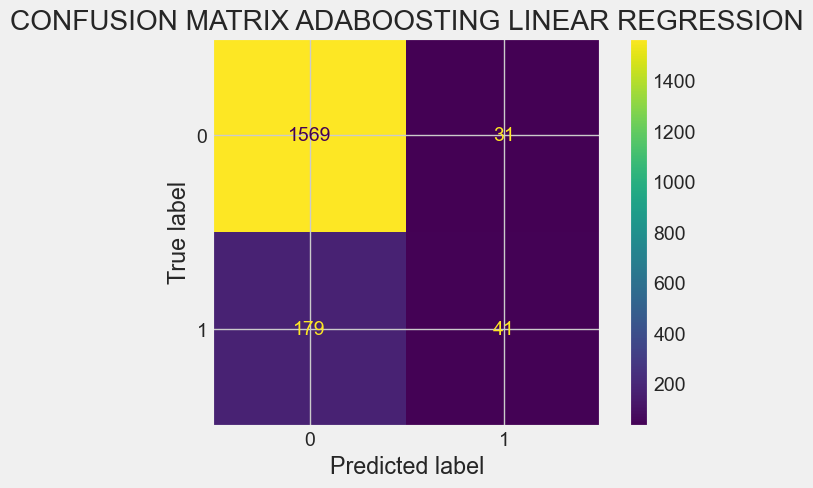

In [76]:
adalr = AdaBoostClassifier(base_estimator=clflr,n_estimators=50,learning_rate=1)

modeladalr = adalr.fit(x_train_set,y_train_set)

y_pred_ada_lr = modeladalr.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_pred_ada_lr))
print("Precision:",precision_score(y_test_set,y_pred_ada_lr))
print("Recall:",recall_score(y_test_set,y_pred_ada_lr))
print("F1:",f1_score(y_test_set,y_pred_ada_lr))
RocCurveDisplay.from_estimator(modeladalr,x_test_set,y_test_set)
plt.title("ROC CURVE ADABOOSTING LINEAR REGRESSION")
ConfusionMatrixDisplay.from_estimator(modeladalr,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX ADABOOSTING LINEAR REGRESSION")
plt.show()

## AdaBoosting GaussianNB ##

Accuracy: 0.5131868131868131
Precision: 0.125
Recall: 0.5045454545454545
F1: 0.2003610108303249


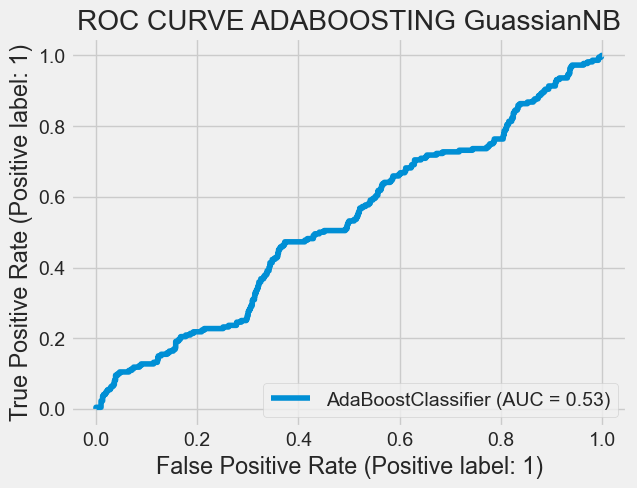

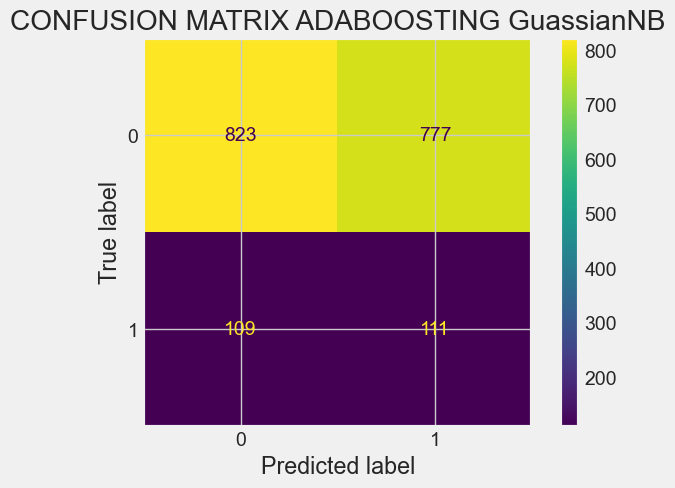

In [77]:
adanb = AdaBoostClassifier(base_estimator=clfnb,n_estimators=50,learning_rate=1)

modeladanb = adanb.fit(x_train_set,y_train_set)

y_pred_ada_nb = modeladanb.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_pred_ada_nb))
print("Precision:",precision_score(y_test_set,y_pred_ada_nb))
print("Recall:",recall_score(y_test_set,y_pred_ada_nb))
print("F1:",f1_score(y_test_set,y_pred_ada_nb))
RocCurveDisplay.from_estimator(modeladanb,x_test_set,y_test_set)
plt.title("ROC CURVE ADABOOSTING GuassianNB")
ConfusionMatrixDisplay.from_estimator(modeladanb,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX ADABOOSTING GuassianNB")
plt.show()

## UNSUPERVISED LEARNING ##

In [78]:
def pipelineKNN(function):
    pipeline=Pipeline([
        ("cluster",function()),
        ("KNeighbors",KNeighborsClassifier(n_neighbors=5,leaf_size=30)),
    ])
    pipeline.fit(x_train_set,y_train_set)
    print("Accuracy Pipeline:",pipeline.score(x_test_set,y_test_set))

    pred = pipeline.predict(x_test_set)
    ss=silhouette_score(x_test_set, pred)
    print("Pipeline silhouette score: ", ss)


##### Find the best number of cluster by using the elbow method

In [79]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_train_set)
    sse.append(kmeans.inertia_)

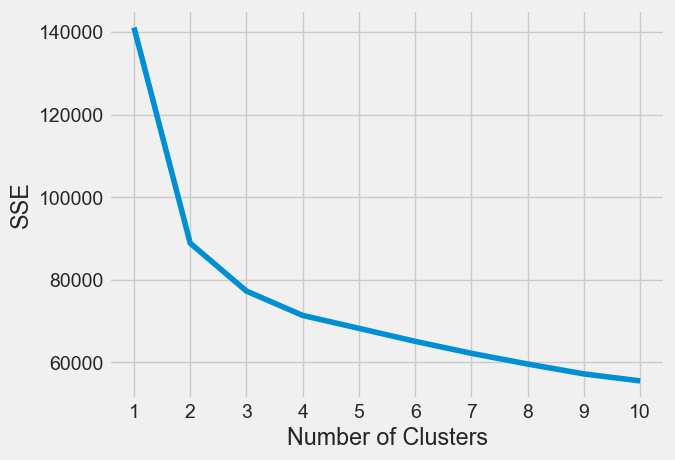

In [80]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [81]:
#KMeans de clustering
from sklearn.metrics import silhouette_score
def kmeans():

    km=KMeans(n_clusters=3,max_iter = 20)
    km.fit(x_train_set)
    pred=km.predict(x_test_set)
    ss=silhouette_score(x_test_set, pred)

    print("K-mean \n-------------")
    print("Average silhouette score: ", ss)

    pipelineKNN(lambda:KMeans(n_clusters=3))



In [82]:
#Agglomerative
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
def Agglomerative():
    a=AgglomerativeClustering(n_clusters=3)
    pred=a.fit_predict(x_train_set)

    print()
    print("Agglomerative Clustering \n-------------")


    plt.figure(figsize =(8, 8))
    plt.title('Visualising the data')
    Dendrogram = dendrogram((linkage(x_train_set, method ='ward')))



In [83]:
#Birch
from sklearn.cluster import Birch
def birch():
    b=Birch(n_clusters=3)
    b.fit(x_train_set)
    pred=b.predict(x_test_set)

    print()
    print("Birch \n-------------")
    pipelineKNN(lambda:Birch(n_clusters=3))

In [84]:
#Algoritmo Spectral clustering
from sklearn.cluster import SpectralClustering

def Spectral():
    s=SpectralClustering(n_clusters=3).fit(x_train_set)

    print()
    print("Spectral Clustering \n-------------")


K-mean 
-------------
Average silhouette score:  0.20907216152580915
Accuracy Pipeline: 0.8708791208791209
Pipeline silhouette score:  0.10048579113813007

Birch 
-------------
Accuracy Pipeline: 0.8895604395604395
Pipeline silhouette score:  0.09893757452870304

Agglomerative Clustering 
-------------

Spectral Clustering 
-------------


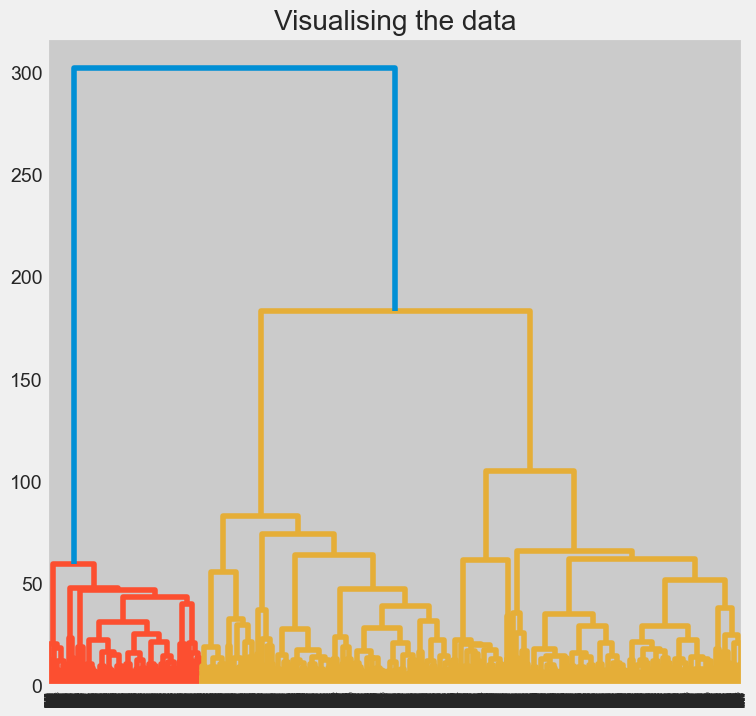

In [85]:
kmeans()
birch()
Agglomerative()
Spectral()

In [86]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
yLabelTrue = y_train_set['y'].map({'yes' : 1 , 'no' : 0})
X, y = x_train_set, yLabelTrue


algorithms = []
algorithms.append(KMeans(n_clusters=3))
algorithms.append(Birch(n_clusters=3))
algorithms.append(SpectralClustering(n_clusters=3))
algorithms.append(AgglomerativeClustering(n_clusters=3))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity','Completeness', 'V-measure', 'Silhouette'],
                       index=['K-means', 'Birch', 'Spectral', 'Agglomerative'])

results

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').